In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names=[]


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print(len(file_names))

42745


In [3]:
file_names.sort()

In [4]:
print(file_names[0])

/kaggle/input/indian-sign-language-isl/Indian/1/0.jpg


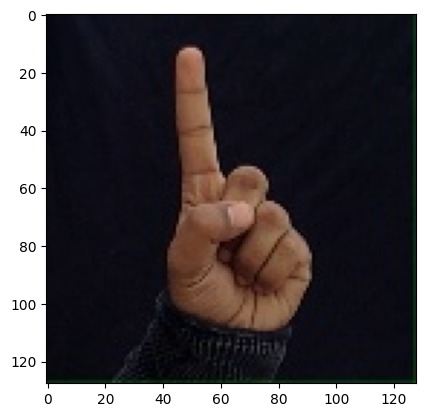

In [5]:
#now lets show the image 
import matplotlib.pyplot as plt
import cv2


z=plt.imread(file_names[0])
plt.imshow(z)


In [6]:
def get_image_label(img_path):
    part1,part2=img_path.split("Indian")

    part3=part2.split("/")[1]
    
    return part3

In [7]:
#now lets try to get the image as well as the label 
dataset=[]
for i in range(len(file_names)):
    data=[]
    
    image_label=get_image_label(file_names[i])
    data.append(file_names[i])
    data.append(image_label)
    
    dataset.append(data)
    
    
    

In [8]:
print(dataset[0])

['/kaggle/input/indian-sign-language-isl/Indian/1/0.jpg', '1']


In [9]:
#now lets create a pandas dataframe from the above dataset
column=['image_path','class_labels']
final_dataset=pd.DataFrame(dataset,columns=column)

final_dataset

,image_path,class_labels
0,/kaggle/input/indian-sign-language-isl/Indian/...,1
1,/kaggle/input/indian-sign-language-isl/Indian/...,1
2,/kaggle/input/indian-sign-language-isl/Indian/...,1
3,/kaggle/input/indian-sign-language-isl/Indian/...,1
4,/kaggle/input/indian-sign-language-isl/Indian/...,1
...,...,...
42740,/kaggle/input/indian-sign-language-isl/Indian/...,Z
42741,/kaggle/input/indian-sign-language-isl/Indian/...,Z
42742,/kaggle/input/indian-sign-language-isl/Indian/...,Z
42743,/kaggle/input/indian-sign-language-isl/Indian/...,Z


In [10]:
print(len(set(final_dataset['class_labels'])))

print(final_dataset['class_labels'][0])

35
1


In [11]:
import math
class_list=list(set(final_dataset['class_labels']))
print(class_list)
#now since we get the final dataset 
#now lets perform the split into the train and the test set

x_train=[]
y_train=[]
x_test=[]
y_test=[]


for j in class_list:
    count=0
    for i in range(len(final_dataset)):
        if final_dataset['class_labels'][i]==j:
            if (count<1000):
                x_train.append(final_dataset['image_path'][i])
                y_train.append(j)
                count=count+1
            else:
                x_test.append(final_dataset['image_path'][i])
                y_test.append(j)
                
print(len(x_train),len(y_train))
        

        

['A', '7', 'W', 'O', '9', 'F', 'E', 'Z', 'D', '1', 'V', 'J', 'K', 'M', 'N', 'T', 'H', 'R', 'Y', 'S', 'X', 'B', 'L', '5', 'U', 'I', 'G', 'Q', '6', 'P', '3', '8', 'C', '2', '4']
35000 35000


In [12]:
print(x_train[0])

/kaggle/input/indian-sign-language-isl/Indian/A/0.jpg


In [14]:
#now lets create the model for this we import the necessary dependencies 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import * 
from keras.utils import plot_model
from keras.models import Model 

In [15]:
z=plt.imread(dataset[0][0])
print(z.shape)

(128, 128, 3)


In [16]:
#lets see the performance of the autoencoder network to see how it performs 
#we will try to split the image into the three parts so that the model , tries to get the feature vectors across all the color channels
#hence we would take in three inputs pertaining to each color channel
blue_input=Input((128,128,1))

#here we perform the convolution channels
conv_1=Conv2D(64,3,padding='same',activation='relu',name='blue_conv1')(blue_input)
conv_2=Conv2D(64,1,padding='same',activation='relu')(conv_1)
conv_3=Conv2D(32,3,padding='same',activation='relu')(conv_2)
conv_4=Conv2D(32,1,padding='same',activation='relu')(conv_3) #feature vectors 
conv_5=Conv2D(16,3,padding='same',activation='relu')(conv_4)
conv_6=Conv2D(16,1,padding='same',activation='relu')(conv_5)
conv_7=Conv2D(8,1,padding='same',activation='relu')(conv_6)
conv_8=Conv2D(1,1,padding='same',activation='relu')(conv_7)

average_pooling=AveragePooling2D((2,2))(conv_8)

#resultant shape would be 64x64



green_input=Input((128,128,1))

#here we perform the convolution channels
conv_9=Conv2D(64,3,padding='same',activation='relu',name='green_conv1')(green_input)
conv_10=Conv2D(64,1,padding='same',activation='relu')(conv_9)
conv_11=Conv2D(32,3,padding='same',activation='relu')(conv_10) #used for getting the feature vector 
conv_12=Conv2D(32,1,padding='same',activation='relu')(conv_11)
conv_13=Conv2D(16,3,padding='same',activation='relu')(conv_12)
conv_14=Conv2D(16,1,padding='same',activation='relu')(conv_13)
conv_15=Conv2D(8,1,padding='same',activation='relu')(conv_14)
conv_16=Conv2D(1,1,padding='same',activation='relu')(conv_15)

average_pooling1=AveragePooling2D((2,2))(conv_16)

#resultant shape would be 64x64






red_input=Input((128,128,1))

#here we perform the convolution channels
conv_17=Conv2D(64,3,padding='same',activation='relu',name='red_conv1')(red_input)
conv_18=Conv2D(64,1,padding='same',activation='relu')(conv_17) #here we evaluate the features for getting the fature vector 
conv_19=Conv2D(32,3,padding='same',activation='relu')(conv_18)
conv_20=Conv2D(32,1,padding='same',activation='relu')(conv_19)
conv_21=Conv2D(16,3,padding='same',activation='relu')(conv_20)
conv_22=Conv2D(16,1,padding='same',activation='relu')(conv_21)
conv_23=Conv2D(8,1,padding='same',activation='relu')(conv_22)
conv_24=Conv2D(1,1,padding='same',activation='relu')(conv_23)

average_pooling2=AveragePooling2D((2,2))(conv_24)

#resultant shape would be 64x64


#now after getting the shape we concatenate the feature vectors 
concatenate_layer=concatenate([average_pooling2,average_pooling1,average_pooling])

flatten=Flatten()(concatenate_layer)
dense_layer=Dense(128,activation='relu')(flatten)

dense_layer1=Dense(64,activation='relu')(dense_layer)

output_layer=Dense(35,activation='softmax')(dense_layer1)

#lets wrap the model and then see

isl_model=Model(inputs=[red_input,green_input,blue_input],outputs=output_layer)

isl_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ red_conv1 (Conv2D)  │ (None, 128, 128,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ green_conv1         │ (None, 128, 128,  │        640 │ input_layer_1[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ blue_conv1 (Conv2D) │ (None, 128, 128,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 128, 128,  │      4,160 │ red_conv1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 128,  │      4,160 │ green_conv1[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      4,160 │ blue_conv1[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 128, 128,  │     18,464 │ conv2d_14[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 128, 128,  │     18,464 │ conv2d_7[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     18,464 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 128, 128,  │      1,056 │ conv2d_15[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 128, 128,  │      1,056 │ conv2d_8[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      1,056 │ conv2d_1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 128, 128,  │      4,624 │ conv2d_16[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 128, 128,  │      4,624 │ conv2d_9[0][0]  

 Total params: 1,671,606 (6.38 MB)

 Trainable params: 1,671,606 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

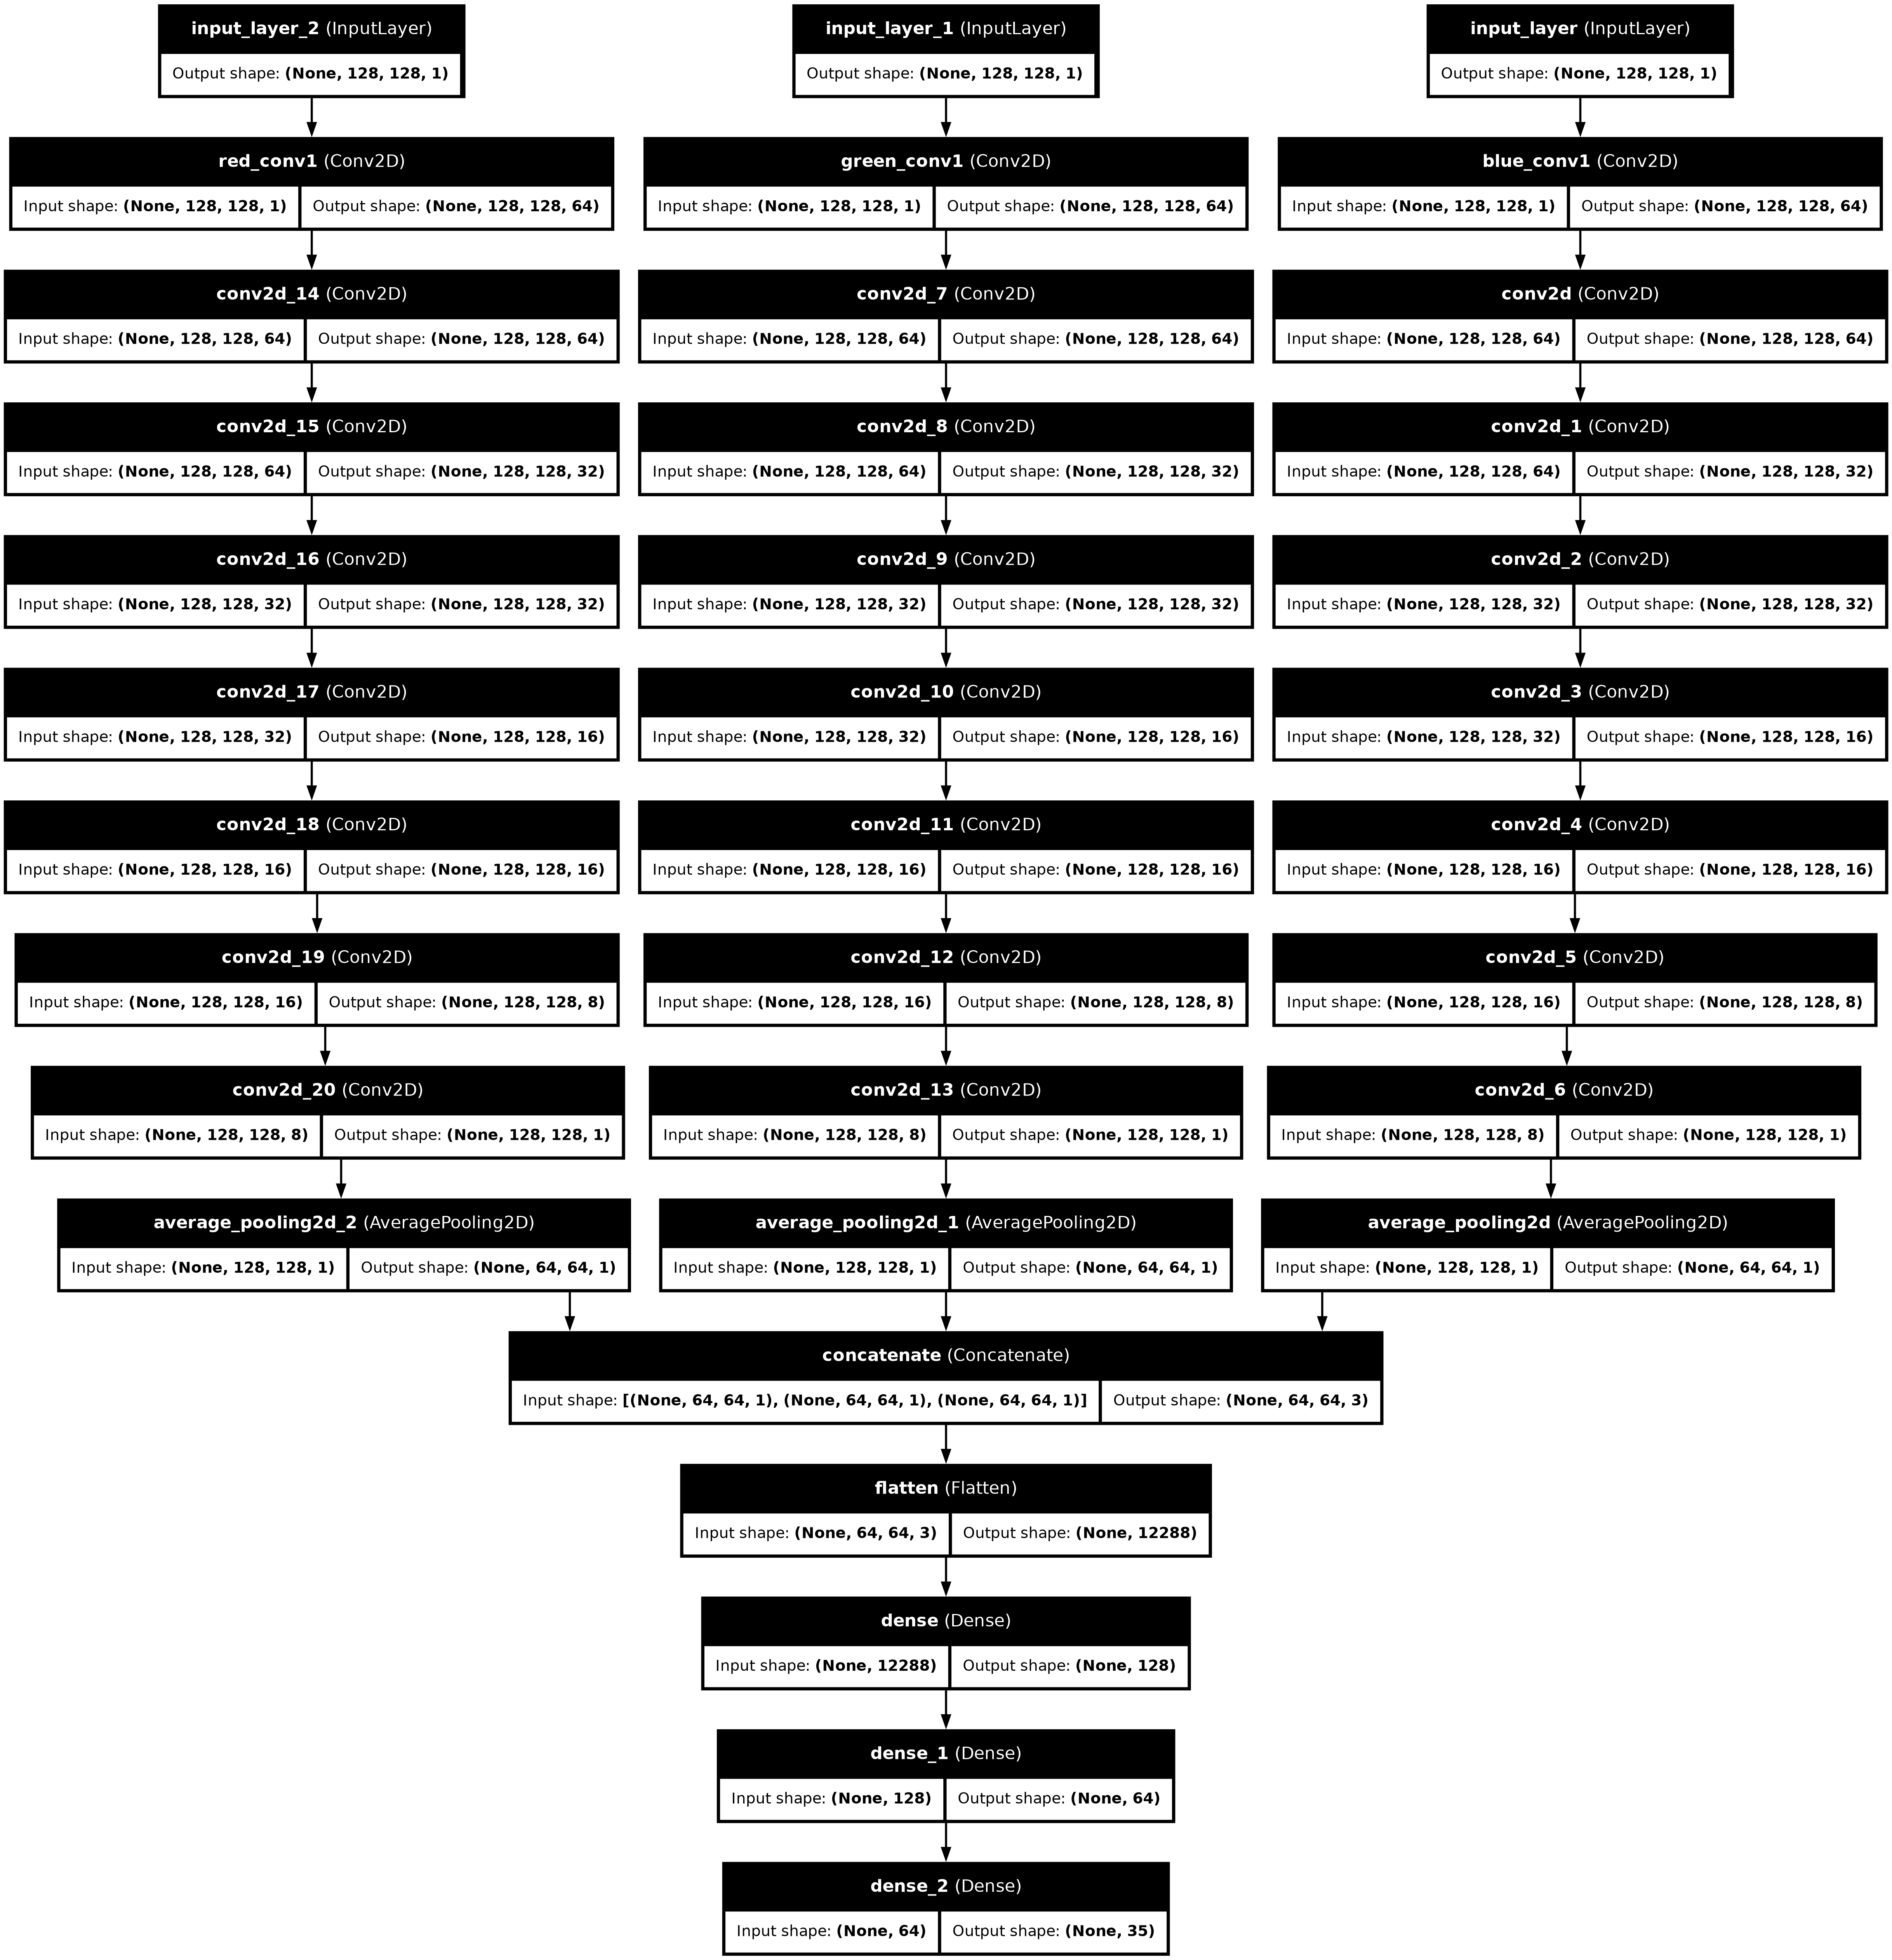

In [17]:
#now lets plot the model 
plot_model(isl_model,show_layer_names=True,show_shapes=True)

In [18]:
#here we would seperate them into their corresponding color channels
def segregate_color_channels(img_path):
    z=plt.imread(img_path)
    resized_image=cv2.resize(z,(128,128)) #STANDARDIZE THE SIZE
    red_channel,green_channel,blue_channel=[resized_image[:,:,i] for i in range(3)]
    
    return [red_channel,green_channel,blue_channel]


In [19]:
red,green,blue=segregate_color_channels('/kaggle/input/indian-sign-language-isl/Indian/1/0.jpg')

print(red.shape,green.shape,blue.shape)

(128, 128) (128, 128) (128, 128)


In [20]:
#now we prepare the final train and  the test set 
segregated_color_channels=[]
for i in range(len(x_train)):
    
    red,green,blue=segregate_color_channels(x_train[i])
    stacked_channels = np.stack([red, green, blue], axis=-1)
    segregated_color_channels.append(stacked_channels)

    if i%1000 ==0:
        print(f"index {i} done")
    if red.shape!=(128,128) or blue.shape!=(128,128) or green.shape!=(128,128):
        print(red.shape,blue.shape,green.shape)
        print('getting. error at {}'.format(i))
        
segregated_color_channels=np.asarray(segregated_color_channels)
    
    
    


index 0 done
index 1000 done
index 2000 done
index 3000 done
index 4000 done
index 5000 done
index 6000 done
index 7000 done
index 8000 done
index 9000 done
index 10000 done
index 11000 done
index 12000 done
index 13000 done
index 14000 done
index 15000 done
index 16000 done
index 17000 done
index 18000 done
index 19000 done
index 20000 done
index 21000 done
index 22000 done
index 23000 done
index 24000 done
index 25000 done
index 26000 done
index 27000 done
index 28000 done
index 29000 done
index 30000 done
index 31000 done
index 32000 done
index 33000 done
index 34000 done


In [21]:
print(segregated_color_channels[0].shape)

(128, 128, 3)


In [22]:
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)
#now we also need to change the test set



In [23]:
segregated_test=[]
for i in range(len(x_test)):
    red,green,blue=segregate_color_channels(x_test[i])
    
    stacked_channels = np.stack([red, green, blue], axis=-1)
    segregated_test.append(stacked_channels)

    if i%1000 ==0:
        print(f"index {i} done")
    if red.shape!=(128,128) or blue.shape!=(128,128) or green.shape!=(128,128):
        print(red.shape,blue.shape,green.shape)
        print('getting. error at {}'.format(i))
        
segregated_test=np.asarray(segregated_test)
    
    

index 0 done
index 1000 done
index 2000 done
index 3000 done
index 4000 done
index 5000 done
index 6000 done
index 7000 done


In [24]:
print(segregated_test[0].shape)


(128, 128, 3)


In [26]:
#lets convert the y_train and the y_test into the categorical or the one hot vectors
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_int = label_encoder.fit_transform(y_train)

# Convert to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)  # Number of unique classes
y_train_categorical = tf.keras.utils.to_categorical(y_train_int, num_classes=35)



In [27]:
label_encoder = LabelEncoder()
y_test_int = label_encoder.fit_transform(y_test)

# Convert to categorical (one-hot encoding)
num_classes = len(label_encoder.classes_)  # Number of unique classes
y_test_categorical = tf.keras.utils.to_categorical(y_test_int, num_classes=35)



In [28]:
print(y_train_categorical[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [29]:
from keras.optimizers import Adam
isl_model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are integers
                  metrics=['accuracy'],run_eagerly=True)

In [30]:
#now lets fit the data to the model 
segregated_color_channels_array = np.array(segregated_color_channels, dtype=np.float32)  # Convert to numpy array with float32 dtype
segregated_test = np.array(segregated_test, dtype=np.float32)  # Convert to numpy array with float32 dtype


red_channels = segregated_color_channels[:, :, :, 0]
green_channels = segregated_color_channels[:, :, :, 1]
blue_channels = segregated_color_channels[:, :, :, 2]

print(red_channels.shape)

red_channels_test = segregated_test[:, :, :, 0]
green_channels_test = segregated_test[:, :, :, 1]
blue_channels_test = segregated_test[:, :, :, 2]



(35000, 128, 128)


Epoch 1/3
350/350 ━━━━━━━━━━━━━━━━━━━━ 263s 719ms/step - accuracy: 0.8422 - loss: 0.6258 - val_accuracy: 0.9730 - val_loss: 0.1098
Epoch 2/3
350/350 ━━━━━━━━━━━━━━━━━━━━ 244s 698ms/step - accuracy: 0.9982 - loss: 0.0135 - val_accuracy: 0.9924 - val_loss: 0.0367
Epoch 3/3
350/350 ━━━━━━━━━━━━━━━━━━━━ 244s 698ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.9912 - val_loss: 0.0370


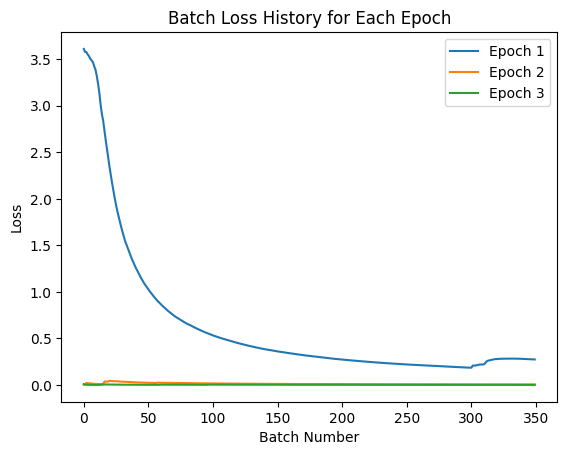

In [31]:
import matplotlib.pyplot as plt
from keras.callbacks import Callback

class BatchLossHistory(Callback):
    def on_train_begin(self, logs=None):
        self.batch_losses = []
        self.epoch_batches = []
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_batches.append([])

    def on_batch_end(self, batch, logs=None):
        loss = logs.get('loss')
        self.batch_losses.append(loss)
        self.epoch_batches[-1].append(loss)

# Create an instance of the callback
batch_loss_history = BatchLossHistory()

# Train the model with the callback
history = isl_model.fit(
    [red_channels, green_channels, blue_channels], y_train_categorical,
    epochs=3, batch_size=100, verbose=1,
    validation_data=([red_channels_test, green_channels_test, blue_channels_test], y_test_categorical),
    callbacks=[batch_loss_history]
)

# Plotting the batch loss history
for epoch, batch_losses in enumerate(batch_loss_history.epoch_batches):
    plt.plot(batch_losses, label=f'Epoch {epoch+1}')

plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.title('Batch Loss History for Each Epoch')
plt.legend()
plt.show()

